# Credit EDA - Loan Default

This project **aims** to identify patterns which indicate if a client faces difficulty in paying their loan installments. These patterns could be help the business in determining possible course of actions such as *denying the loan, reducing the amount of loan, lending to riskier applicants at a higher interest rate,* etc. <br>

These patterns will also help the company not reject consumers who are capable of repaying the loan. Through this project, we can get some idea about the driving factors behind loan default using just Exploratory Data Analysis (EDA). The company will utilize this knowledge for its portfolio and risk assessment.

Libraries used in this project are: **Numpy, Pandas, Matplotlib, Seaborn**

## List of Contents

**1. Introduction** <br>
1.1 - Understanding the Business Problem <br>
1.2 - Data <br>
1.3 - Importing Modules and Pulling Data <br>

**2. Data Cleaning** <br>
2.1 - Dropping columns <br>
2.2 - Imputing null values <br>
2.3 - Quality Check <br>

**3. Exploratory Data Analysis Part - 1** <br>
3.1 - Data Imbalance <br>
3.2 - Univariate Analysis - Categorical Variables <br>
3.3 - Correlation of Continuous Variables <br>
3.4 - Univariate Analysis - Continous Variables <br>
3.5 - Bivariate Analysis <br>

**4. Exploratory Data Analysis Part - 2** <br>
4.1 - Univariate Analysis <br>
4.2 - Bivariate Analysis <br>
4.3 - Results and Conclusion <br>

## 1. - Introduction

### 1.1 - Understanding the Business Problem

Loan providing companies find it difficult to approve loans to consumers with an insufficient or non existent credit history. When a consumer finance company receives a loan application, the company's decision is based on the client's profile. Two types of risks are associated with the company's decision: <br>

*  Not approving a loan where the applicant is likely to repay the loan resulting in a **loss of business** for the company.
*  Approving a loan where the applicant is not likely to repay the loan and consequently default resulting in a **financial loss** for the company.

When a client applies for a loan, there are 4 decisions that the company can take:
1. **Approved** - The company approves the loan
2. **Cancelled** - The client cancelled the application during the approval process. The client could have changed their mind or due to a higher risk of the client, he/she must have recieved a higher interest pricing which the client wasn't interested in.
3. **Refused** - The company had rejected the loan as the client's profile doesn't meet their requirements.
4. **Unused Offer** - The client cancelled the application during a different stage than the approval stage.

Looking at current loan applicants, they roughly fall into 2 scenarios for this purpose of this project.

*  **The client with payment difficulties:** He/She had late payment more than X days on atleast one of the first Y instalments of the loan in our sample
*  **All other cases:** All other cases where the payment was made in time.

### 1.2 - Data

The data for this project contains 2 sources of data and 1 data dictionary. <br>

The first dataset *('application_data.csv')* contains all the information of the client at the time of the loan application. It also contains information whether the applicant has **payment difficulties or not**. <br>

The second dataset *('previous_application.csv')* contains all the information about the client's previous loan applications with the loan vender. The decisions of those applications **(Approved, Cancelled, Refused, and Unused Offer)** are in this dataset. 

The third dataset *('columns_description.csv')* is data dictionary which describes the meaning of the variables. <br>

NOTE: The above data is a subset of data from the Home Credit Default Risk prediction competition from Kaggle. <br>
Link: https://www.kaggle.com/c/home-credit-default-risk/data

### 1.3 - Importing Modules and Pulling Data

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pulling Data
app = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')

## 2. Data Cleaning
 
This part consists of the following:<br>
2.1 - Dropping columns <br>
2.2 - Imputing null values <br>
2.3 - Quality Check <br>

### 2.1 - Dropping columns

*  Examined shape, and removed columns with null values over 50% for both app and prev_app dataframes.

In [3]:
# shape of app
app.shape

(307511, 122)

The first dataframe has 307,511 rows with 122 columns. The first step is to check for columns with missing values.

In [4]:
# Checking for percentage of missing values sorted in descending
round(app.isnull().sum()/len(app)*100,2).sort_values(ascending = False).head(10)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_AVG     69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MEDI       68.35
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
dtype: float64

As there are columns with over 50% missing values, it is essential for our analysis to delete columns with high percentage of missing values. If we impute these columns at such a high number of missing values, it can distort our analysis. <br>

In [5]:
# Function to remove null values based on percentage of null values.
def removeNulls(dataframe, axis =1, percent=0.3):
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)
    return df

In [6]:
# removing columns with null values over 50 percent
app = removeNulls(app, percent=0.5)

Number of Columns dropped	:  41

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 81)


After removing unwanted columns, app has 307,511 rows and 81 columns. <br>
Now, columns with high percentage of null values from the **prev_app** dataframe get removed.

In [7]:
# shape of prev_app
prev_app.shape

(1670214, 37)

The dataframe containing previous loan applications has 1.67 million rows and 37 columns. We will check for null value percentages for this dataframe as well.

In [8]:
# Checking for percentage of missing values sorted in descending
round(prev_app.isnull().sum()/len(prev_app)*100,2).sort_values(ascending = False).head(10)

RATE_INTEREST_PRIVILEGED     99.64
RATE_INTEREST_PRIMARY        99.64
RATE_DOWN_PAYMENT            53.64
AMT_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE              49.12
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
dtype: float64

In [9]:
# removing columns with null values over 50 percent
prev_app = removeNulls(prev_app, percent=0.5)

Number of Columns dropped	:  4

Old dataset rows,columns (1670214, 37) 
New dataset rows,columns (1670214, 33)


### 2.2 - Imputing null values

*  Looked at Imputation methods for continous and categorical variables
*  Imputated some columns in both dataframes

The way to deal with missing values will be ***imputation***. As these dataframes contain columns with different datatypes and represent different values, a general imputation method will not work.

*For continous variables:*

**1. Mean/Median/Mode:** This is a simple method which doesn't take relationship between the variables or the time series into account. This method can be used on numeric columns which aren't extremely important and have a low number of null values. Big disadvantage of this method is it reduces variability.

**2. Linear Regression:** A regression model predicts the missing values of a variables based on other variables. Heavily correlated variables are used to predict the missing values. It is an improvement over using the Mean/Median/Mode, however as the missing values were predicted from the other values, the values seem to fit well reducing the standard error. This method involves the assumption of a linear relationship between the variables chosen. 

*For categorical variables:*

**1. Mode**: A simple method to impute categorical variables but comes with heavy bias. Useful for unimportant columns with less percentage of missing data.

**2. Prediction Model:** Using a predictive model such as logistic regression or ANOVA (Analysis of Variance). In this method, we divide the dataset into two datasets, one dataset with no missing values (training) and another dataset with missing values (test).

------------------------------------------------------------------------------------------------------------------------------

For this project, we won't actually be imputing all missing values. The reason for this is because this is an EDA project and not a Machine Learning one. Only some columns in both the dataframes are imputed and is given below:

**Continous Variables**: Imputing in the case of continous variables depends on the continous variable to be imputed. With very less missing values we can either choose from using mean or mode as demonstrated below.

In [10]:
# imputing missing values with mean of column for AMT_GOODS_PRICE
app.loc[np.isnan(app.loc[:,'AMT_GOODS_PRICE']), 'AMT_GOODS_PRICE'] = round(app.AMT_GOODS_PRICE.mean(),2)

# imputing missing values with mode of column for DEF_30_CNT_SOCIAL_CIRCLE
app.loc[np.isnan(app.loc[:,'DEF_30_CNT_SOCIAL_CIRCLE']), 'DEF_30_CNT_SOCIAL_CIRCLE'] = app.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0]

# imputing missing values with mode of column for OBS_60_CNT_SOCIAL_CIRCLE
app.loc[np.isnan(app.loc[:,'OBS_60_CNT_SOCIAL_CIRCLE']), 'OBS_60_CNT_SOCIAL_CIRCLE'] = app.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0]

From the above, we have imputed the categorical variables in the following way:

*  In the app dataframe, **AMT_GOODS_PRICE** has 0.09% or around 278 missing values. This is a continous column with very few missing values, so we have used the **mean of the column (538396.21)** to impute the rest of the values. <br>
<br>
*  In the app dataframe, **DEF_30_CNT_SOCIAL_CIRCLE** has 0.33% or around 1021 missing values. This is a continous column but with discrete values (integers), so here it's more appropiate to use the **mode of the column (0.0)** to impute the rest of the values.<br>
<br>
* In the app dataframe, **OBS_60_CNT_SOCIAL_CIRCLE** has 0.33% or around 1021 missing values. This is a continous column but with discrete values (integers), so here it's more appropiate to use the **mode of the column (0.0)** to impute the rest of the values. 

**Categorical Variables**: Imputing in the case of a categorical variable is tricky, but with very few missing values we can use the **mode** of the column to impute the missing values without distorting the data.

In [11]:
# imputing missing values with mode of column for NAME_TYPE_SUITE
app.loc[pd.isnull(app.loc[:,'NAME_TYPE_SUITE']), 'NAME_TYPE_SUITE'] = app.NAME_TYPE_SUITE.mode()[0]

# imputing missing values with mode of column for PRODUCT_COMBINATION
prev_app.loc[pd.isnull(prev_app.loc[:,'PRODUCT_COMBINATION']), 'PRODUCT_COMBINATION'] = prev_app.PRODUCT_COMBINATION.mode()[0]

From the above, we have imputed the categorical variables in the following way:

*  In the app dataframe, **NAME_TYPE_SUITE** has 0.42% or 1292 missing values. We would impute the null values with the mode of the column which is **'Unaccompanied'**. <br>
<br>
*  In the prev_app dataframe, **PRODUCT_COMBINATION** has 0.02% or around 346 missing values. We would impute the null values with the mode of the column which is **'Cash'**.

### 2.3 - Quality Check

*  Checking the datatype composition of all columns
*  Spotting outliers in some columns
*  Binning of continous variable

**Datatype composition of columns**

In [12]:
# checking the number of each type of column for both the dataframes
print("data types for app are \n{}".format(app.dtypes.value_counts()))
print("\ndata types for prev_app are \n{}".format(prev_app.dtypes.value_counts()))

data types for app are 
int64      41
float64    27
object     13
dtype: int64

data types for prev_app are 
object     16
float64    11
int64       6
dtype: int64


Above, we see the datatype composition of columns for both the dataframes. After going through the columns and their datatypes, we have the following corrections:

In the **app** dataframe the following columns:

CNT_CHILDREN, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH have a datatype of **int64**. They should be changed to **float64**.

In the **prev_app** dataframe: 

DAYS_DECISION has a datatype of **int64**. Should be changed to **float64**. <br>
NFLAG_INSURED_ON_APPROVAL has a datatype of **float64**. Should be changed to **int64**.

The above columns datatypes should be switched to ensure we choose the right columns for analysis. Continous variables can be represented by int and float datatypes, but categorical variables when represented by numbers (such as 1 or 0) should have datatypes of int barring exceptions. We are ensuring the datatypes of all continous variables to be float in this project to ensure we don't pick numeric categorical variables in our correlation and bivariate analysis.

In [13]:
# changing the datatypes of columns
app.CNT_CHILDREN = app.CNT_CHILDREN.astype('float64')
app.DAYS_BIRTH = app.DAYS_BIRTH.astype('float64')
app.DAYS_EMPLOYED = app.DAYS_EMPLOYED.astype('float64')
app.DAYS_ID_PUBLISH = app.DAYS_ID_PUBLISH.astype('float64')

prev_app.DAYS_DECISION = prev_app.DAYS_DECISION.astype('float64')

**Outliers**

*  Found outliers for 3 continous columns in the app dataframe; DAYS_BIRTH, DAYS_EMPLOYED, and AMT_INCOME_TOTAL
*  Analyzed in the case of errors and treated them

In [14]:
# seeing summary statistics for DAYS_BIRTH
print((app['DAYS_BIRTH']/-365).describe())
print('\n')

# seeing summary statistics for DAYS_EMPLOYED
print(app['DAYS_EMPLOYED'].describe())
print('\n')

# seeing summary statistics for AMT_INCOME_TOTAL
print((app['AMT_INCOME_TOTAL']).describe())

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


From the above summary statistics for 3 columns, we notice that only DAYS_EMPLOYED and AMT_INCOME_TOTAL show signs of outliers.<br>

Max value of **DAYS_EMPLOYED** is positive (when the rest of the data is negative) and is 1000 years! The mean is way higher than the median clearly indicating the presence of many error values. <br>

Max value of **AMT_INCOME_TOTAL** is extremely high compared to rest of the data, however the mean is only slightly ahead of the median which could mean only a few extremely high values. This means we cannot say with certainty that it is an error value. 

Let's confirm our findings in both the cases by actually looking at the variables.

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
204564      4500000.0
103006      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
Name: AMT_INCOME_TOTAL, dtype: float64


Text(0.5, 0, 'Days Employment')

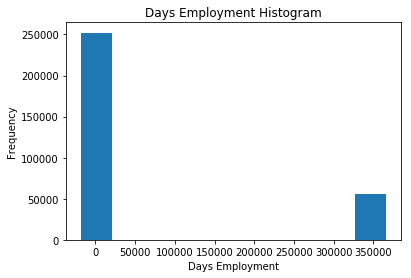

In [15]:
# sorted values in AMT_INCOME_TOTAL
print(app.AMT_INCOME_TOTAL.sort_values(ascending = False).head(10))

# histogram for DAYS_EMPLOYED
app['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

Our observations based on the summary statistics were accurate. *AMT_INCOME_TOTAL* has an **extremely high** outlier. It is plausible someone with that net worth has applied for a loan so we cannot conclude it is an error. <br>

From the histogram for *DAYS_EMPLOYED*, we can clearly see the presence of **error** values at a frequency of over **50,000** times. We'll replace the incorrect values with a null value.

In [16]:
# replacing the wrong values with NaNs
app['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

**Binning of Continous Variable**

*  Converted DAYS_BIRTH in app dataframe to YEARS_BIRTH
*  Created bins for every age range with respect to the maximum and minimum age in years
*  Found the Average Age grouped by the age range

In [17]:
# Binning the DAYS_BIRTH column to find the AVERAGE AGE grouped by the Age Range

age = app[['TARGET', 'DAYS_BIRTH']].copy()
age['YEARS_BIRTH'] = age['DAYS_BIRTH'] / -365
age_bins = [20, 30, 40, 50, 60, 70]
age['AGE_RANGE'] = pd.cut(x = age['YEARS_BIRTH'], bins = len(age_bins)-1, labels = ['[20 - 30)', '[30 - 40)', '[40 - 50)', '[50 - 60)', '[60 - 70)'])
age_group = age.groupby('AGE_RANGE').mean()
print(age_group['YEARS_BIRTH'])

AGE_RANGE
[20 - 30)    26.755446
[30 - 40)    35.214270
[40 - 50)    44.583767
[50 - 60)    54.513130
[60 - 70)    62.980042
Name: YEARS_BIRTH, dtype: float64


## 3. Exploratory Data Analysis Part - 1

Contains the following parts: <br>
3.1 - Data Imbalance <br>
3.2 - Univariate Analysis - Categorical Variables <br>
3.3 - Correlation of Continuous Variables <br>
3.4 - Univariate Analysis - Continous Variables <br>
3.5 - Bivariate Analysis - Continous Variables

In [18]:
# preview app dataframe
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The **TARGET** column is an important variable for our analysis as it describes if the applicant has payment difficulties or not. Segmented univariate analysis and correlation analysis will be done with respect to this column.

In [19]:
# preview prev_app dataframe
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


The **SK_ID_PREV** column in the above dataframe is the ID of the loan applied in the past, while **SK_ID_CURR** is the ID of the loan present in the *app* dataframe. <br>

This means all the clients who have applied for a loan in prev_app have a current loan application. This is helpful to understand as we can relate the 2 dataframes through the same clients using their current loan application ID as the column to join these dataframes on. <br>

### 3.1 - Data Imbalance

*  Identified data imbalance with respect to 'TARGET' variable and ratio.

0    282686
1     24825
Name: TARGET, dtype: int64

Ratio of Data Imbalance is 0.0878


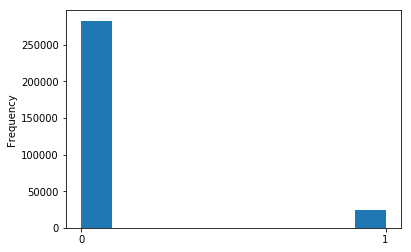

In [20]:
# Value counts for the TARGET variable
print(app['TARGET'].value_counts())

# Ratio of Data Imbalance
print('\nRatio of Data Imbalance is {}'.format(round(app.TARGET.value_counts()[1]/app.TARGET.value_counts()[0], 4)))

# Histogram to visualize the difference
app['TARGET'].plot(kind = 'hist', xticks = [0,1])

As we can see the data is pretty imbalanced. As mentioned before, analysis will be done with respect to the TARGET variable. We will split the dataset on the TARGET variable.

In [21]:
# separate dataframes for target = 1, and target = 0
app_target1 = app.loc[app.TARGET == 1]
app_target0 = app.loc[app.TARGET == 0]

In [22]:
# dimensions of the new dataframes
print(app_target1.shape)
print(app_target0.shape)

(24825, 81)
(282686, 81)


### 3.2 - Univariate Analysis - Categorical Variables

*  Built function for plotting graphs for univariate analysis 
*  Plotted graphs to analyze some categorical variables
*  Reported insights

In [23]:
# Function to plot graphs for univariate analysis based on type of variable
def univariate_cat(df,col,hue =None):
    
    '''
    Univariate_cat function will plot a Countplot based on the parameters for categorical variables.
    df      : dataframe name
    col     : Column name
    hue     : (optional) Can analyze with respect to another categorical variable.
    
    '''
    sns.set(style="darkgrid")
   
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
    if len(temp.unique()) > 0:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(app))), (p.get_x()+0.05, p.get_height()+20))
    else:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
    del temp      
    plt.show()

Using the above function, we will plot some graphs for categorical variables. The columns to be analyzed are: CODE_GENDER, NAME_CONTRACT_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, and OCCUPATION_TYPE.

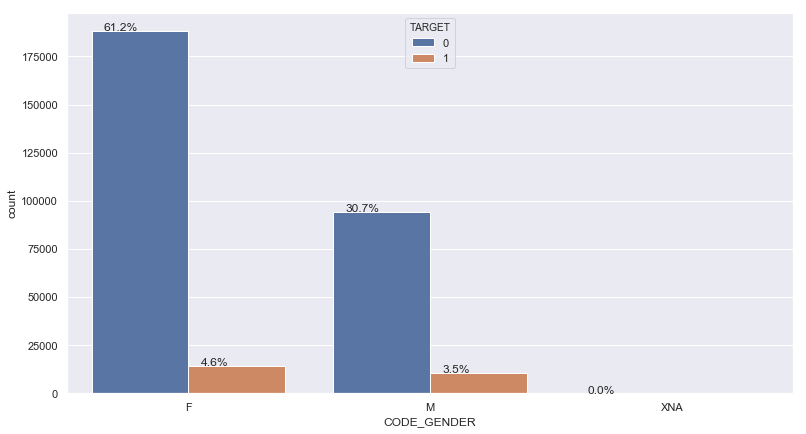

In [24]:
univariate_cat(df=app,col='CODE_GENDER',hue='TARGET')

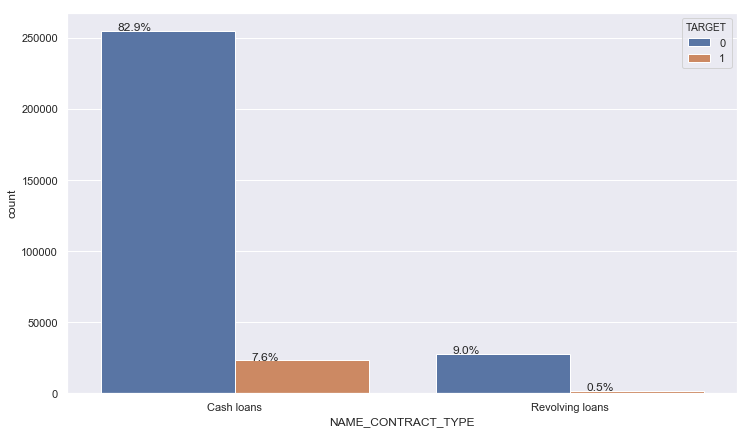

In [25]:
univariate_cat(df=app,col='NAME_CONTRACT_TYPE',hue='TARGET')

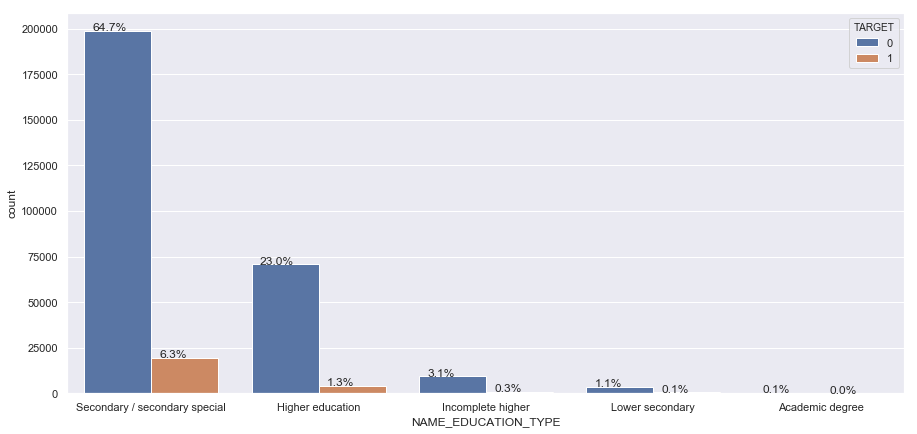

In [26]:
univariate_cat(df=app,col='NAME_EDUCATION_TYPE',hue='TARGET')

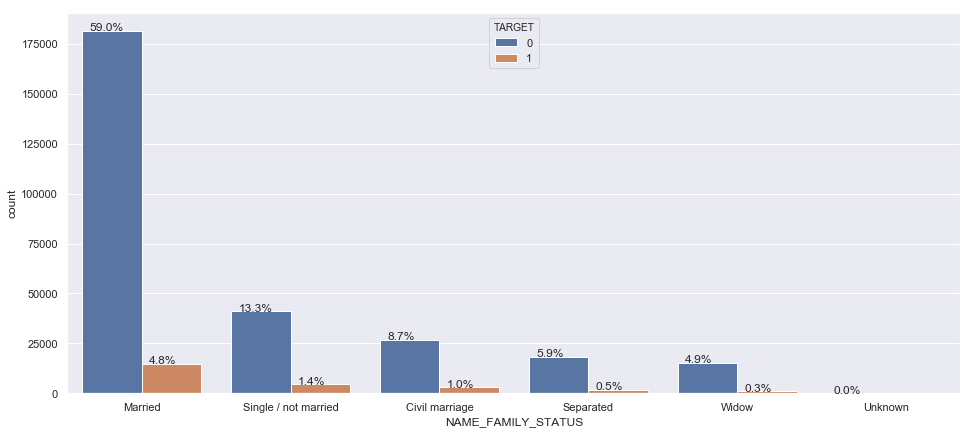

In [27]:
univariate_cat(df=app,col='NAME_FAMILY_STATUS',hue='TARGET')

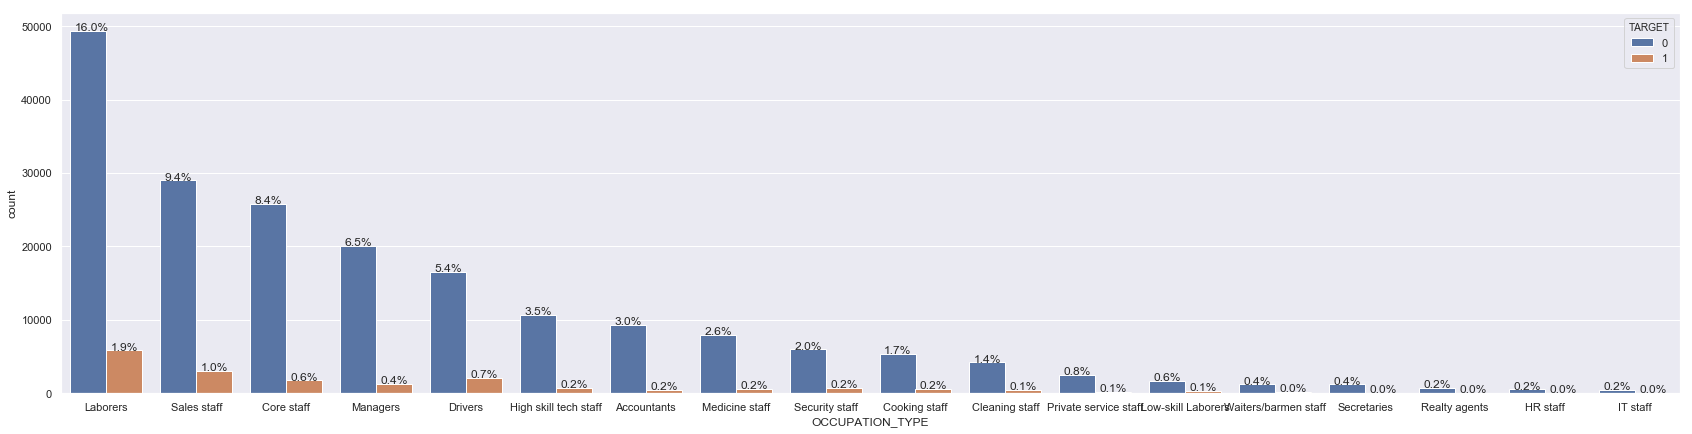

In [28]:
univariate_cat(df=app,col='OCCUPATION_TYPE',hue='TARGET')

From the above plots, we get the following insights:

*  From CODE_GENDER, we see that **Females(4.6%)** default more than **Males(3.5%)**. However, looking at the ratios, **Males(0.114)** tend to default more than **Females(0.075)** on average.
*  From NAME_CONTRACT_TYPE, we observe **Cash Loan contracts(7.6%)** default more than **Revolving Loan contracts(0.5%)**. Looking at the ratios, **cash loans contracts(0.09)** default more than **revolving loan contracts(0.03)**.
*  From NAME_EDUCATION_TYPE, we see that people with **Secondary/Secondary special education level(6.3%)** default the most. Looking at the ratios, **Secondary/Secondary special education level(0.097) education level** default more than any other education level.
*  From NAME_FAMILY_STATUS, we can see people who are **married(4.8%)** default the most. Looking at the ratios, people who are in a **civil marriage(0.115)** default the most often.
*  From OCCUPATION_TYPE, we observe that **Laborers(1.9%)** default the most. Looking at the ratios, **Low-skilled laborers(0.16)** followed by **Drivers(0.129)** defaut the most often. However, 9 times more drivers apply for loans than low-skilled laborers.

So from the above information, we can see how **Males, Cash Loan contracts, secondary education level, civil marriage, Low-skilled laborers** tend to default more often than their counterparts.

### 3.3 - Correlation of Continuous Variables

*  Checked direct correlation between TARGET variable and other variables
*  Created dataframes with only continous variables (columns with float datatypes) for heatmap analysis as mentioned earlier.
*  Plotted heatmaps for all continous variables for both cases of TARGET
*  Found top 10 correlations for both cases of TARGET and checked if the top correlations are same in both cases

A good way to try to understand the data is to check which variables correlate with the TARGET variable. We will use the Pearson method.

In [29]:
correlation =app.corr(method='pearson')['TARGET'].sort_values(ascending = False)
print('Top Positive Correlations are \n{}\n'.format(correlation.head(10)))
print('Top Negative Correlations are \n{}'.format(correlation.tail(10).sort_values()))

Top Positive Correlations are 
TARGET                         1.000000
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

Top Negative Correlations are 
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039628
REGION_POPULATION_RELATIVE   -0.037227
TOTALAREA_MODE               -0.032596
AMT_CREDIT                   -0.030369
FLAG_DOCUMENT_6              -0.028602
Name: TARGET, dtype: float64


We see that DAYS_BIRTH is the top positive correlation (0.078) and EXT_SOURCE_3 is the top negative correlation (-0.179). No variable is above 0.6 or -0.6 correlation at the very minimum so we would have to combine suitable variables to get a combination of variables strong enough to predict loan default. <br>

Let's find top correlations of continuous variables wrt to the TARGET variable.

In [30]:
floats = ['float16', 'float32', 'float64']

# app_target0_heatmap variable for strictly continous variables
app_target0_heatmap = app_target0.select_dtypes(include=floats)

# app_target1_heatmap variable for strictly continous variables
app_target1_heatmap = app_target1.select_dtypes(include=floats)

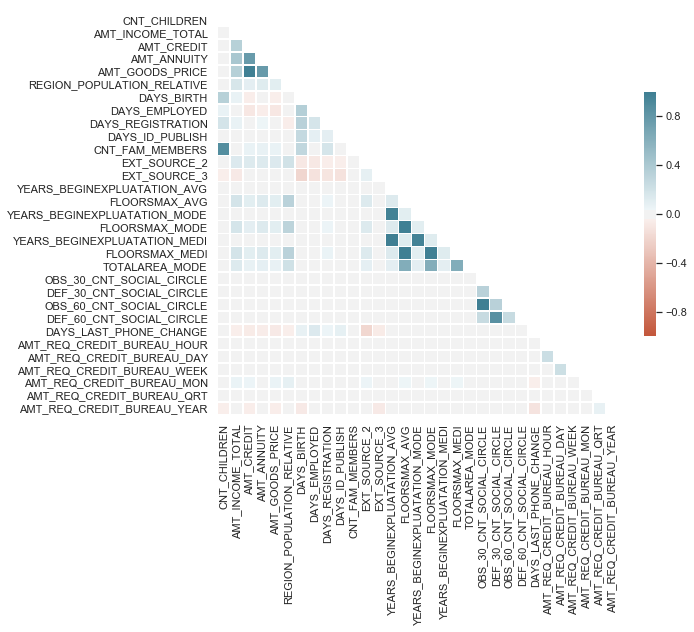

In [31]:
# heatmap for the correlation matrix for target = 0
sns.set(style="white")

# computed the correlation matrix
corr0 = app_target0_heatmap.corr()

# generated a mask for the upper triangle
mask = np.zeros_like(corr0, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# generated a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# plotting the heatmap with the mask
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr0, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin= -1.0, vmax= 1.0)

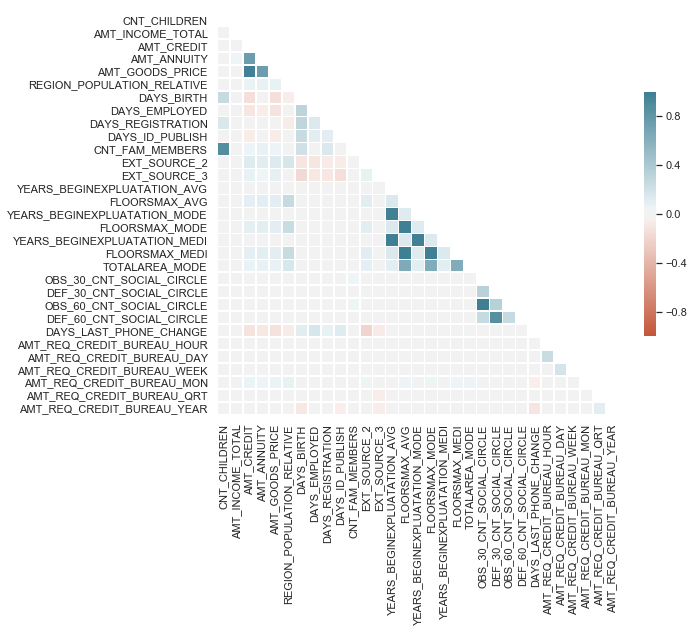

In [32]:
# heatmap for the correlation matrix for target = 0
sns.set(style="white")

# computed the correlation matrix
corr1 = app_target1_heatmap.corr()

# generated a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# generated a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# plotting the heatmap with the mask
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr1, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin= -1.0, vmax= 1.0)

In [33]:
# printing the top 10 correlated pairs for TARGET = 0
corr0_sorted = corr0.abs().unstack().sort_values(ascending = False).drop_duplicates()
print(corr0_sorted[1:11])

OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998508
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997018
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
AMT_CREDIT                    AMT_GOODS_PRICE                 0.986880
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.985603
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.971032
                              YEARS_BEGINEXPLUATATION_MEDI    0.962064
CNT_FAM_MEMBERS               CNT_CHILDREN                    0.878571
DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE        0.859332
dtype: float64


In [34]:
# printing the top 10 correlated pairs for TARGET = 1
corr1_sorted = corr1.abs().unstack().sort_values(ascending = False).drop_duplicates()
print(corr1_sorted[1:11])

OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998269
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997187
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996124
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
AMT_GOODS_PRICE               AMT_CREDIT                      0.982566
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978073
CNT_CHILDREN                  CNT_FAM_MEMBERS                 0.885484
DEF_30_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE        0.868994
dtype: float64


Comparing the above correlations, we can see they contain the same pairs. There are only few slight differences which are noted below:

*  For *TARGET = 0*, **AMT_GOODS_PRICE and AMT_CREDIT** are the **5th** highest correlation while **FLOORSMAX_AVG and FLOORSMAX_MODE** are the **5th** highest correlation for *TARGET = 1*. These pairs flip in their rankings for the other case respectively.
*  In both cases the correlation values for the same pairs in both cases are very close to each other.

The suitable pairs could be used to better predict loan default. We can choose a combination of variables (more than 2) to increase prediction rate. We won't be doing that in this project as we just want to get a rough idea about the data and how it relates rather than a high prediction rate.

### 3.4 - Univariate Analysis - Continous Variables

*  Plotted graphs to analyze some continuous variables
*  Reported insights

In [35]:
# Function to plot graphs for univariate analysis based on type of variable
def univariate_con(df,col):
    
    '''
    Univariate function will plot a Boxplot based on the parameters.
    df      : dataframe name
    col     : Column name
    '''
    sns.set(style="darkgrid")
    
    plt.figure(figsize=(8,8))
    sns.boxplot(data=df, x='TARGET', y=col)
    plt.show()

Using the above univariate function, will plot some graphs for continuous variables. The columns to be analyzed are: AMT_CREDIT, AMT_ANNUITY, DAYS_BIRTH, DAYS_EMPLOYED and EXT_SOURCE_3.

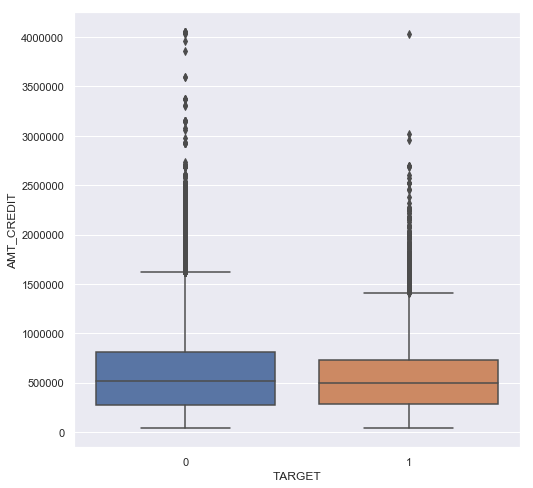

In [36]:
univariate_con(app,'AMT_CREDIT')

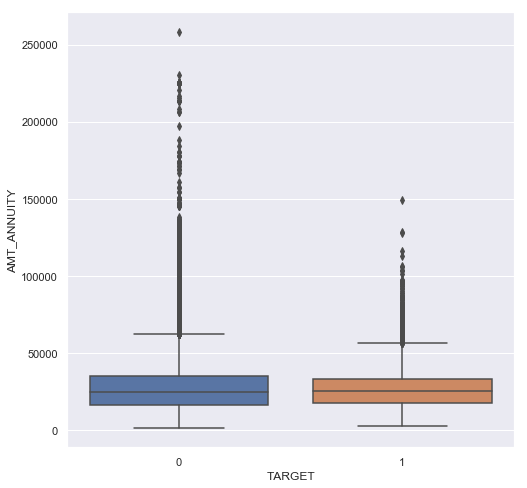

In [37]:
univariate_con(app,'AMT_ANNUITY')

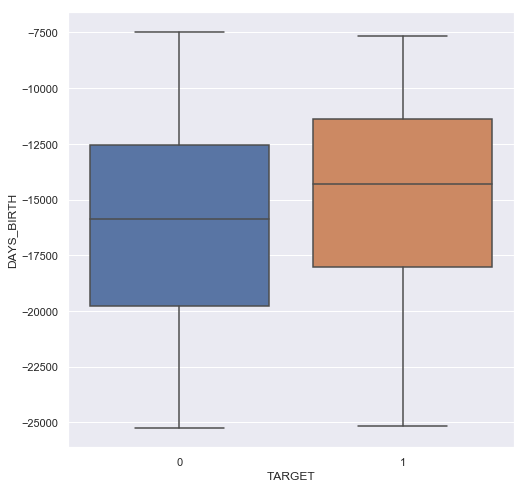

In [38]:
univariate_con(app,'DAYS_BIRTH')

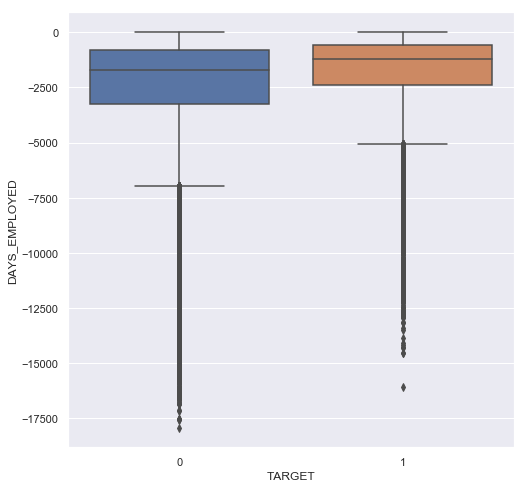

In [39]:
univariate_con(app,'DAYS_EMPLOYED')

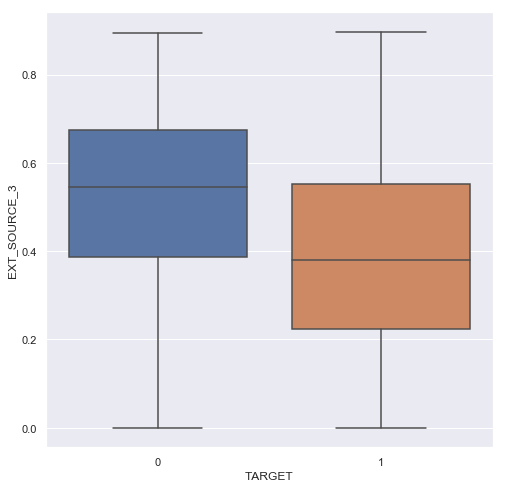

In [40]:
univariate_con(app,'EXT_SOURCE_3')

From the above plots, we get the following insights:

* From the **AMT_CREDIT** column, we see that summary statistics are lower for people with payment difficulties. The key difference here is not the fact that they've defaulted on the loan, rather just missed a payment which would be put them in the TARGET = 1 category. This doesn't mean there are no people in the TARGET = 0 category who barely afford to make their payments.

* From the **AMT_ANNUITY** column, we see that summary statistics are almost similar in both the cases slightly less for people with payment difficulties. This and the AMT_CREDIT column are correlated with *AMT_INCOME_TOTAL* which is slightly less for people who have payment difficulties.

* From the **DAYS_BIRTH** column, we see that younger people tend to have more payment difficulties which intuitively makes sense. The difference in means is 3.5 years. The IQR is slightly smaller when TARGET = 1 which indicates less variability than in the other case.

*  From the **DAYS_EMPLOYED** column, we see that people employed for shorter times tend to have more payment difficulties. The difference in means in this case is around 1.6 years on average. Intuitively this makes sense as people working in a job for longer tend to have more savings.

*  From the **EXT_SOURCE_3** column, we see that every summary statistic is significantly lower(25% lower mean, 30% lower median) where TARGET = 1. We also know that EXT_SOURCE_3 and the other EXT_SOURCE columns have the highest negative correlations directly with the TARGET variable. Although the representation of EXT_SOURCE_3 is not 100% clear, we can say it sort of represents a cumulative credit rating made from multiple sources of data as it refers to an external source of data. This analysis indicates and reflects that people with lower credit rating are likely to have payment difficulties.

So from the above columns we can say that people with **lower total income, lower credit amount, lower annuity amount, lower age, lower longevity at their current employment, and lower credit rating/score** tend to have payment difficulties.

### 3.5 - Bivariate Analysis - Continous Variables

*  Built a function to perform bivariate analysis for continous variables
*  Plotted scatterplots for 3 continous columns
*  Reported insights and confirmed influence of columns on TARGET variable

In [41]:
# function to do bivariate analysis

def bivariate(df1,df2,col1,col2,df):    
    '''
    Bivariate function will plot a Scatterplot based on the parameters.
    df1 and df2       : dataframe names for TARGET = 0 and TARGET = 1
    col1 and col2     : column names to be plotted
    df                : dataframe from which the axes values are set. Both scatterplots have same axes to ensure easy comparison
    '''
    sns.set(style="darkgrid")
    
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(14,7))
    
    ax[0].set_title("Scatter Plot for TARGET = 0")
    a = sns.scatterplot(data=df1, x=col1, y=col2, ax=ax[0])
    a.set_xticklabels(list(np.linspace(0,max(df[col1]),7)), rotation=30)
    a.set_xticks(list(np.linspace(0,max(df[col1]),7)))
    a.set_yticks(list(np.linspace(0,max(df[col2]),7)))
    
    ax[1].set_title("Scatter Plot for TARGET = 1")
    b = sns.scatterplot(data=df2, x=col1, y=col2, ax=ax[1], color="darkorange")
    b.set_xticklabels(list(np.linspace(0,max(df[col1]),7)), rotation=30)
    b.set_xticks(list(np.linspace(0,max(df[col1]),7)))
    b.set_yticks(list(np.linspace(0,max(df[col2]),7)))
    plt.show()

Using the above bivariate function, will plot some scatterplots for continuous variables. The columns to be analyzed are: AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE.

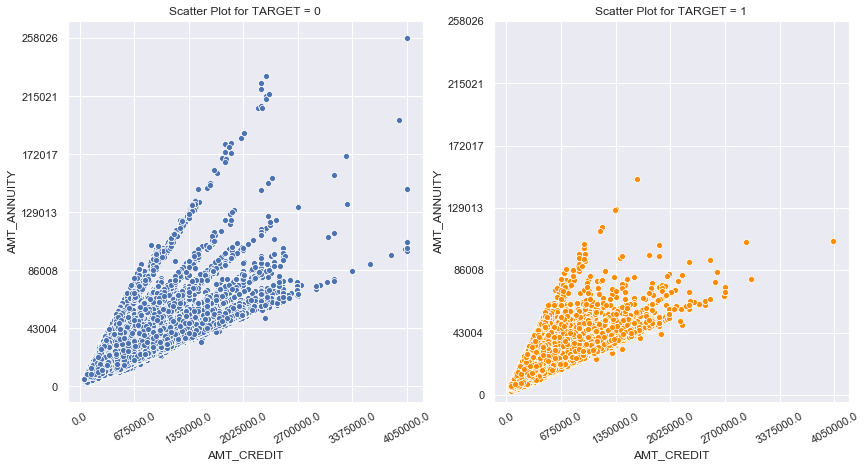

In [42]:
bivariate(app_target0,app_target1,'AMT_CREDIT','AMT_ANNUITY',app)

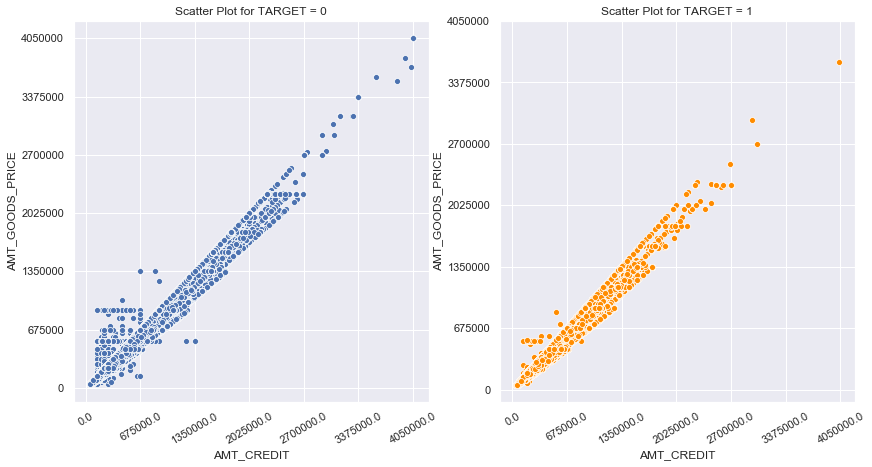

In [43]:
bivariate(app_target0,app_target1,'AMT_CREDIT','AMT_GOODS_PRICE',app)

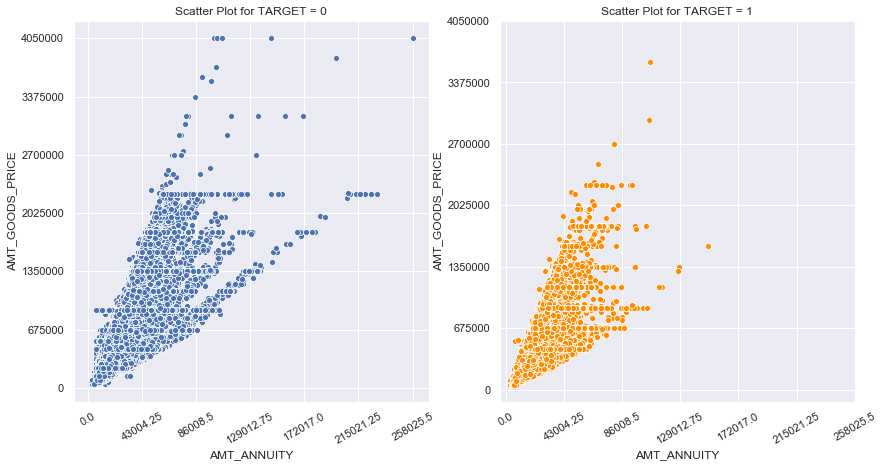

In [44]:
bivariate(app_target0,app_target1,'AMT_ANNUITY','AMT_GOODS_PRICE',app)

From the above plots, we have the following insights:

*  From the scatterplot between **AMT_CREDIT and AMT_ANNUITY** we see the shape formed by both the graphs is similar. We also see how both these columns have a strong linear relationship which is slightly skewed towards AMT_CREDIT.Trying to infer their influence from the graphs alone, we can see how AMT_CREDIT affects the TARGET varianbe slightly more than AMT_ANNUITY.

*  From the scatterplot between **AMT_CREDIT and AMT_GOODS PRICE** we see the shape formed by both the graphs is similar. We also see how both these columns have an extremely strong linear relationship which is slightly skewed towards AMT_CREDIT. Trying to infer their influence from the graphs alone, we can see how AMT_GOODS_PRICE affects the TARGET variable slightly more than AMT_CREDIT.

*  From the scatterplot between **AMT_GOODS PRICE and AMT_ANNUITY** we see the shape formed by both the graphs is similar. We also see how both these columns have a strong linear relationship which is slightly skewed towards AMT_GOODS_PRICE. Trying to infer their influence from the graphs alone, we can see how AMT_GOODS_PRICE affects the TARGET variable slightly more than AMT_ANNUITY.

Trying to infer the relationship of these columns to the TARGET variable from these graphs alone was pretty difficult due to very similar looking graphs and the amount of data points. Let's confirm by finding the correlation values with the TARGET variable for the above columns.

In [45]:
print('The influence of AMT_CREDIT on the TARGET variable is {}'.format(abs(app.corr()['TARGET'].sort_values()['AMT_CREDIT'])))
print('The influence of AMT_ANNUITY on the TARGET variable is {}'.format(abs(app.corr()['TARGET'].sort_values()['AMT_ANNUITY'])))
print('The influence of AMT_GOODS_PRICE on the TARGET variable is {}'.format(abs(app.corr()['TARGET'].sort_values()['AMT_GOODS_PRICE'])))

The influence of AMT_CREDIT on the TARGET variable is 0.03036928646150375
The influence of AMT_ANNUITY on the TARGET variable is 0.012816561515431712
The influence of AMT_GOODS_PRICE on the TARGET variable is 0.03962840801689781


So from the above, we see that order of influence on people with payment difficulties by strongest to weakest is: <br>
**AMT_GOODS_PRICE > AMT_CREDIT > AMT_ANNUITY** which confirms our observations.

## 4. Exploratory Data Analysis - Part 2

Contains the following sections:

4.1 - Univariate Analysis <br>
4.2 - Bivariate Analysis <br>
4.3 - Results and Conclusion <br>

Before we begin the analysis in this past, let's combine both the application dataset and the previous applications dataset to include the TARGET variable. Inner merge done on the SK_ID_CURR column which is present in both the datasets.

In [46]:
# merging app and prev_app dataframes

all_app = app.merge(prev_app, how='inner', on='SK_ID_CURR')

In [47]:
print('Shape of applications dataset is {}'.format(app.shape))
print('Shape of previous applications dataset is {}'.format(prev_app.shape))
print('Shape of all applications dataset is {}'.format(all_app.shape))

Shape of applications dataset is (307511, 81)
Shape of previous applications dataset is (1670214, 33)
Shape of all applications dataset is (1413701, 113)


We have the number of columns at **113** and rows at approx **1.41 million** in number. This is less than the number of rows in previous applications dataset which indicates that some records in prev_app dataset had loans of customers not present in the applications dataset. <br>

In this case as well, we split the dataframe into 2, based on the TARGET variable for analysis.

In [48]:
# separate dataframes for target = 1, and target = 0
all_app_target1 = all_app.loc[all_app.TARGET == 1]
all_app_target0 = all_app.loc[all_app.TARGET == 0]

In [49]:
print(all_app_target1.shape)
print(all_app_target0.shape)
print('The data imbalance ratio is {}'.format(len(all_app_target1)/len(all_app_target0)))

(122360, 113)
(1291341, 113)
The data imbalance ratio is 0.09475421286863811


So the count of *TARGET = 1* is **122,360**, while the count of *TARGET = 0* is **1,291,341**.

### 4.1 - Univariate Analysis

*  Univariate Analysis - Categorical Variable was done on few categorical columns
*  Univariate Analysis - Continuous Variable was done on few continous columns

All analysis henceforth is done on ***columns from the previous application*** dataset. Merge was done in order to include the TARGET column which is not present on the prev_app dataframe.

**Univariate Analysis - Categorical**

Univariate Analysis of few important Categorical variables namely; **NAME_CONTRACT_STATUS** which has information about the decisions of previous loan applications. The decisions were Approved, Cancelled, Refused, and Unused Offer. <br>

The other columns were NAME_PAYMENT_TYPE, NAME_CLIENT_TYPE, and NAME_YIELD_GROUP. <br>

To reiterate, *TARGET = 1* indicates payment difficulties while *TARGET = 0* indicates no payment difficulties for the clients.

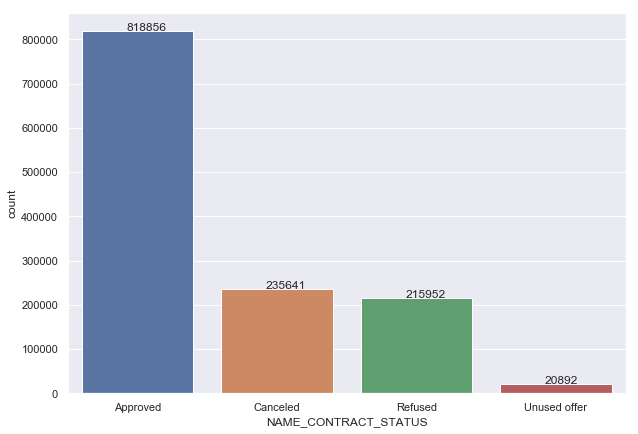

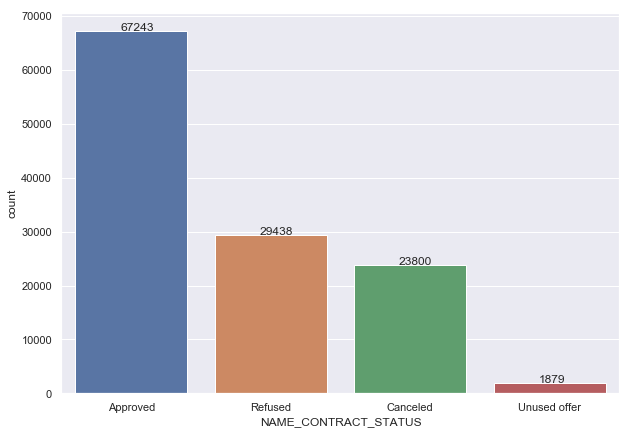

In [50]:
# plotting countplot for TARGET = 0
univariate_cat(df=all_app_target0,col='NAME_CONTRACT_STATUS')
# plotting countplot for TARGET = 1
univariate_cat(df=all_app_target1,col='NAME_CONTRACT_STATUS')

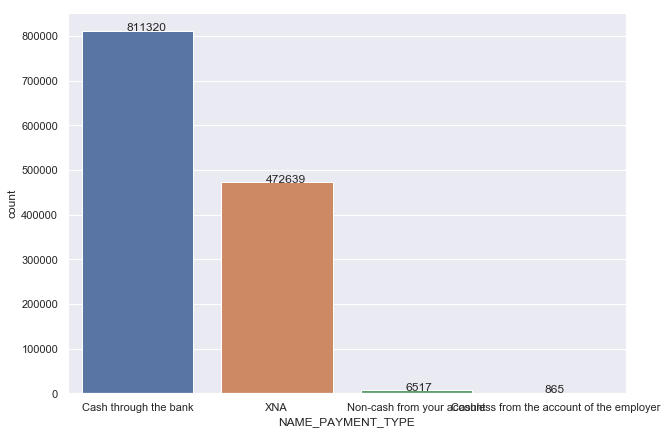

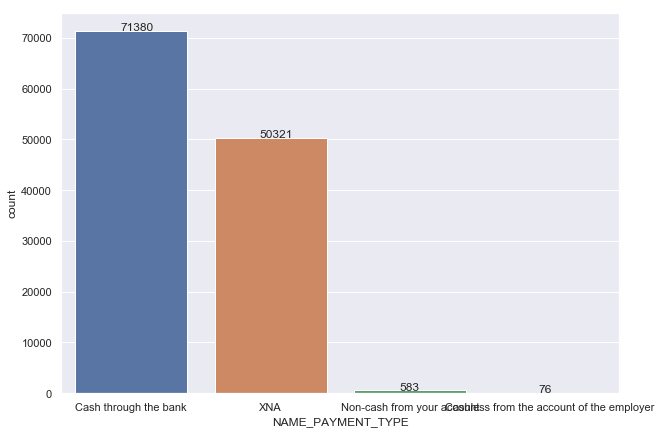

In [51]:
# plotting countplot for TARGET = 0
univariate_cat(df=all_app_target0,col='NAME_PAYMENT_TYPE')
# plotting countplot for TARGET = 1
univariate_cat(df=all_app_target1,col='NAME_PAYMENT_TYPE')

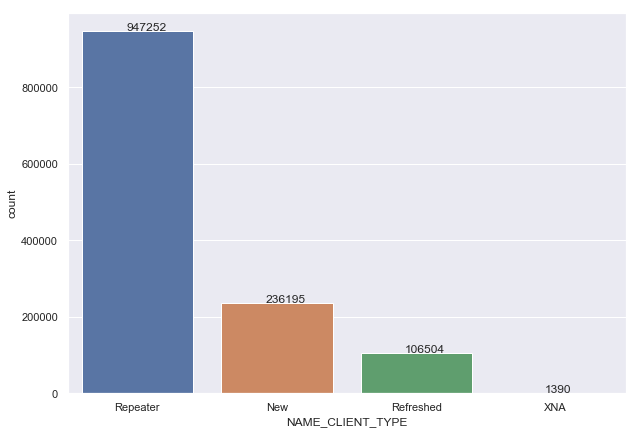

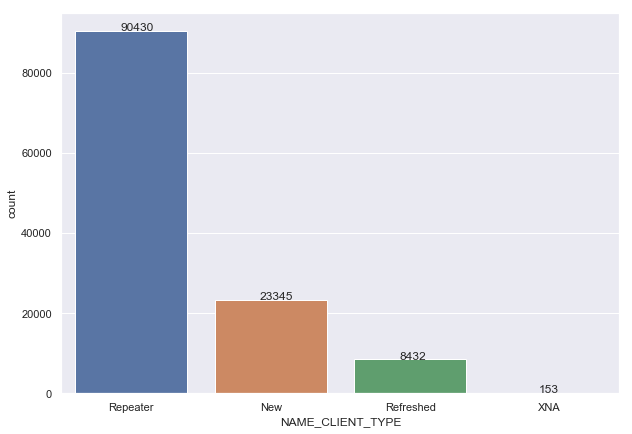

In [52]:
# plotting countplot for TARGET = 0
univariate_cat(df=all_app_target0,col='NAME_CLIENT_TYPE')
# plotting countplot for TARGET = 0
univariate_cat(df=all_app_target1,col='NAME_CLIENT_TYPE')

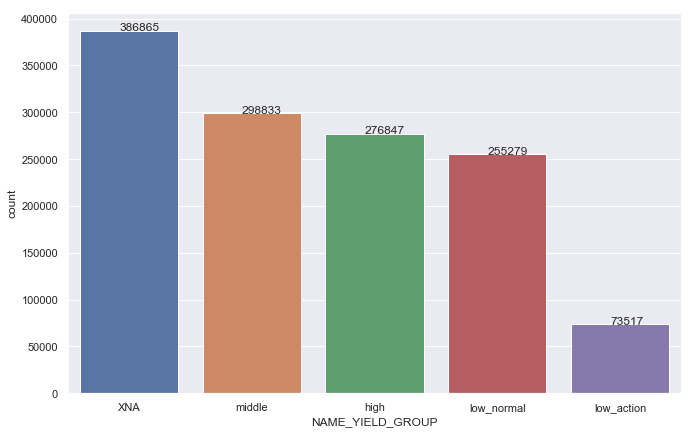

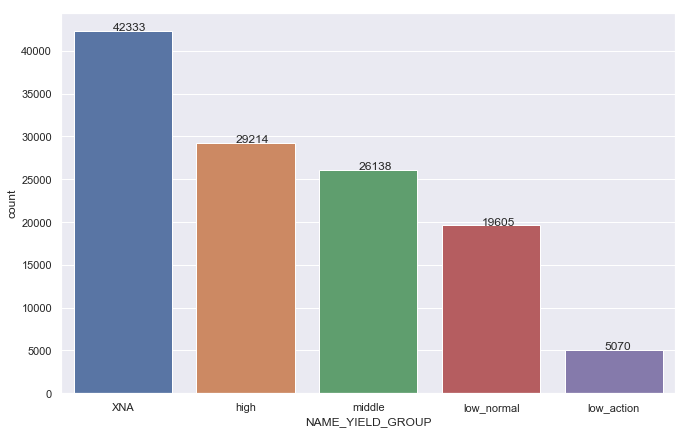

In [53]:
# plotting countplot for TARGET = 0
univariate_cat(df=all_app_target0,col='NAME_YIELD_GROUP')
# plotting countplot for TARGET = 0
univariate_cat(df=all_app_target1,col='NAME_YIELD_GROUP')

From the above categorical analysis, we have the following insights:

*  From the **NAME_CONTRACT_STATUS** column, the most frequent contract status of past applications for clients with payment difficulties was **Approved**. However, the highest ratio was that of **Refused (0.134)**.

* From the **NAME_PAYMENT_TYPE** column, the most frequent payment of past applications for clients with payment difficulties was Cash through the bank. The highest ratio was that of XNA (Not available) with 0.106 followed by a tie between **Cash and Non cash methods**. We cannot conlude anything about the highest ratio here.

* From the **NAME_CLIENT_TYPE** column, the most frequent type of customer of past applications for clients with payment difficulties is Repeater. The highest ratio was that of **New (0.098)**.

* From the **NAME_YIELD_GROUP** column, the most frequent contract status of past applications for clients with payment difficulties was XNA followed by high. The highest ratio was that of XNA with 0.109 followed by **High (0.105)**.

From the above, we can see how customers who were had **refused past applications, who were newer customers, and had high interest rates** tend to default more on their payments.

**Univariate Analysis - Continuous**

Doing a univariate analysis on continuous columns such as,  AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, and DAYS_DECISION.

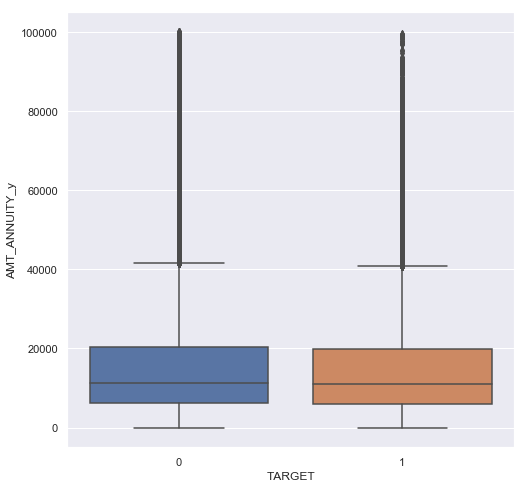

In [54]:
# filtering for values less than 1 mil as extremely high outliers
AMT_ANNUITY_filter = all_app.loc[all_app.AMT_ANNUITY_y < 100000]
univariate_con(AMT_ANNUITY_filter,'AMT_ANNUITY_y')

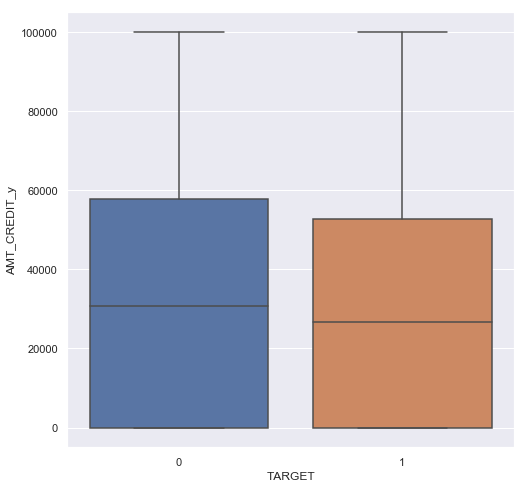

In [55]:
# filtering for values less than 1 mil as extremely high outliers
AMT_CREDIT_filter = all_app.loc[all_app.AMT_CREDIT_y < 100000]
univariate_con(AMT_CREDIT_filter,'AMT_CREDIT_y')

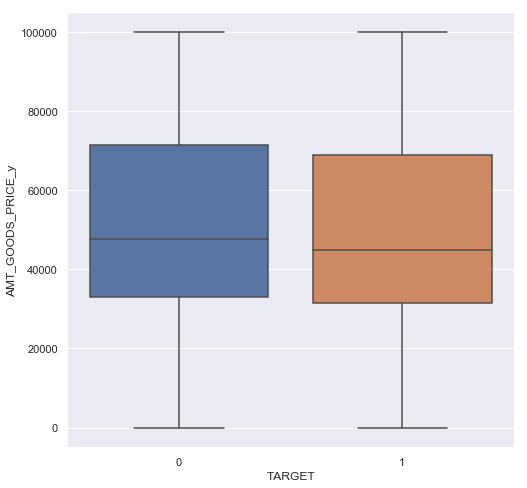

In [56]:
# filtering for values less than 1 mil as extremely high outliers
AMT_GOODS_PRICE_filter = all_app.loc[all_app.AMT_GOODS_PRICE_y < 100000]
univariate_con(AMT_GOODS_PRICE_filter,'AMT_GOODS_PRICE_y')

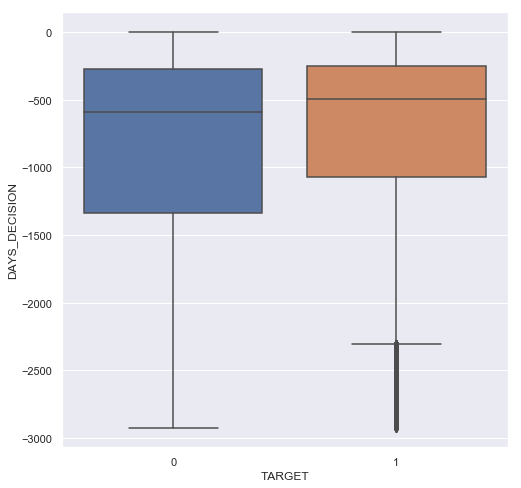

In [57]:
univariate_con(all_app,'DAYS_DECISION')

From the above plots, we have the following insights:

*  From the **AMT_ANNUITY** column in the previous application dataset for clients with payment difficulties (TARGET = 1), they have a very slightly lower median, 25th, and 75th percentiles. ANNUITY is lower for clients with payment difficulties but almost similar  compared to its counterpart.

*  From the **AMT_CREDIT** column in the previous application dataset for clients with payment difficulties, they have lower median and 75th percentiles compared to their counterparts. However, the 25th percentiles is the same which indicates lower variability wrt to AMT_CREDIT for clients with payment difficulties.

*  From the **AMT_GOODS_PRICE** column in the previous application dataset for clients with payment difficulties, they have lower median, 25th and 75th percentiles compared to their counterpart; clients with no payment difficulties. Customers with payment difficulties have slightly less variability wrt to AMT_GOODS_PRICE.

* From the **DAYS_DECISION** column in the previous application dataset for clients with payment difficulties, they have slighty higher 75th percentile, higher median, and much higher 25th percentiles compared to their counterparts. This indicates people with payment difficulties have less days in between their last loan application than people with no payment difficulties.

From the above columns we can say that clients with **lower annuity amount, lower credit, lower price of goods, and fewer days between 2 loan applications** tend to default more.

### 4.2 - Bivariate Analysis

*  Plotted scatterplots for 3 continous columns
*  Reported insights and confirmed influence of columns on TARGET variable

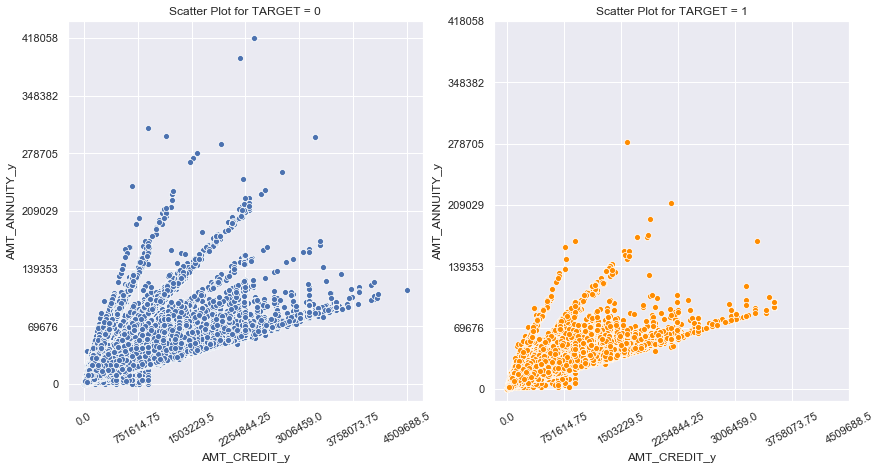

In [58]:
bivariate(all_app_target0,all_app_target1,'AMT_CREDIT_y','AMT_ANNUITY_y',all_app)

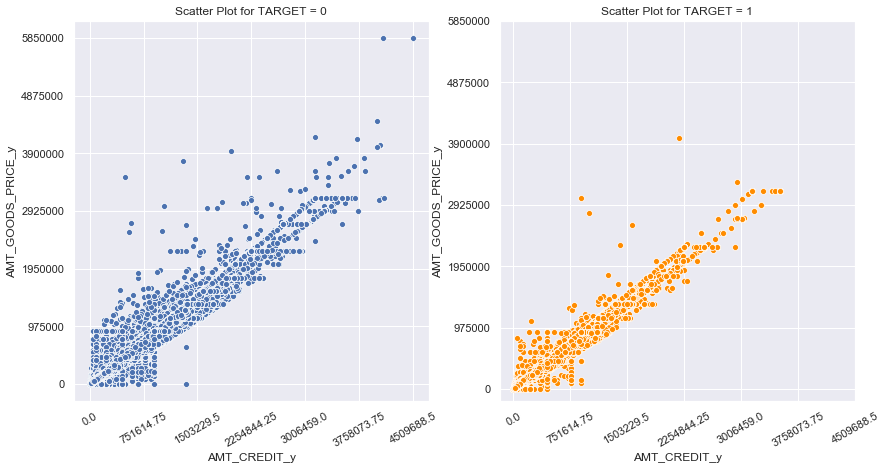

In [59]:
bivariate(all_app_target0,all_app_target1,'AMT_CREDIT_y','AMT_GOODS_PRICE_y',all_app)

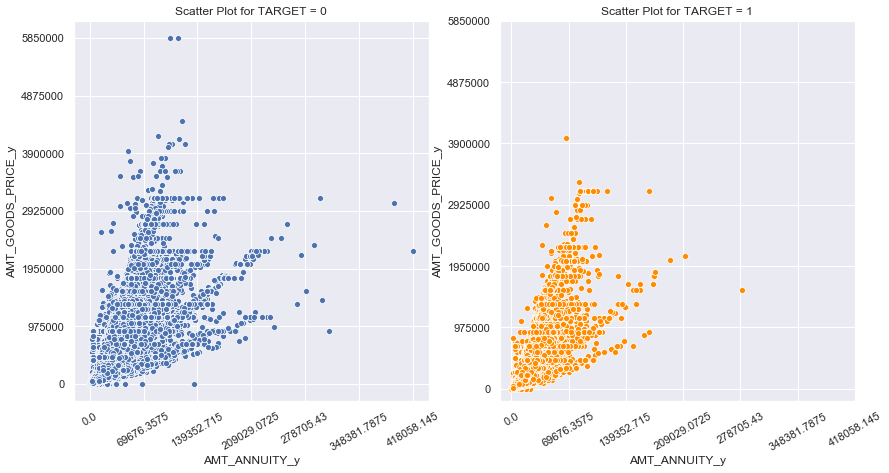

In [60]:
bivariate(all_app_target0,all_app_target1,'AMT_ANNUITY_y','AMT_GOODS_PRICE_y',all_app)

From the above plots, we have the following insights:

*  From the scatterplot between **AMT_CREDIT and AMT_ANNUITY** we see the shape formed by both the graphs is similar. We also see how both these columns have a strong linear relationship which is slightly skewed towards AMT_CREDIT.

*  From the scatterplot between **AMT_CREDIT and AMT_GOODS PRICE** we see the shape formed by both the graphs is similar. We also see how both these columns have an extremely strong linear relationship which is slightly skewed towards AMT_CREDIT.

*  From the scatterplot between **AMT_GOODS PRICE and AMT_ANNUITY** we see the shape formed by both the graphs is similar. We also see how both these columns have a strong linear relationship which is slightly skewed towards AMT_GOODS_PRICE.

Trying to infer the relationship of these columns to the TARGET variable from these graphs alone was impossible due to very similar looking graphs and mainly the number of data points in the above plots. Let's find them by the correlation values of the above columns with the TARGET variable.

In [61]:
print('The influence of AMT_CREDIT on the TARGET variable is {}'.format(abs(all_app.corr()['TARGET'].sort_values()['AMT_CREDIT_y'])))
print('The influence of AMT_ANNUITY on the TARGET variable is {}'.format(abs(all_app.corr()['TARGET'].sort_values()['AMT_ANNUITY_y'])))
print('The influence of AMT_GOODS_PRICE on the TARGET variable is {}'.format(abs(all_app.corr()['TARGET'].sort_values()['AMT_GOODS_PRICE_y'])))

The influence of AMT_CREDIT on the TARGET variable is 0.002350348956369058
The influence of AMT_ANNUITY on the TARGET variable is 0.014922495270276856
The influence of AMT_GOODS_PRICE on the TARGET variable is 0.0002539662520178957


So from the above, we see that order of influence on people with payment difficulties by strongest to weakest is: <br>
**AMT_ANNUITY > AMT_CREDIT > AMT_GOODS_PRICE** which confirms our observations.

This order is the opposite of the order we got when doing a bivariate analysis on the same columns in the applications dataset. The reasons for this could be that we are using a different dataset and the fact that we are considering the absolute values of the correlation. The previous bivariate analysis correlations were negative for the 3 variables, which ensures that the order of positive correlations are still in the right order. The only thing that differs is the increase in positive correlation for all the above columns when using a more extensive dataset.

### 4.3 - Results and Conclusion

To recap, in this project, we have explored and analyzed the data of current and previous loan applications. Through univariate and bivariate analysis, we identified 3 main things:

*  How the column variables relate to the TARGET variable
*  Which category within some categorical variables influences loan default the most
*  How some continuous variables relate with each other

The results are given below:

### *Application Dataset*

From the application dataset we analyzed some categorical and continous variables. The categorical ones were **Gender, Contract Type, Education Level, Family Status, and Occupation**. The continuous ones were **Credit Amount, Annuity Amount, Age, Current Employment Length, External Rating Source 3, and Price of Goods**.

These are some interesting variables which had the following results from our analysis:

From Gender, **Males(0.114)** were more likely to default. <br>
From Contract Type, **Cash Loan(0.09)** contracts were more likely to default.<br>
From Education Level, people with **Secondary Education(0.097)** were more likely to default.<br>
From Family Status, people in a **civil marriage(0.115)** were more likely to default.<br>
From Occupation, **low skilled laborers(0.16)** were more likely to default.<br>
From Credit Amount, people with **lower credit** were more likely to default.<br>
From Annuity Amount, people with vlower annuityv were more likely to default.<br>
From Age, **younger** people were more likely to default.<br>
From Current Employment Length, people employed for a **shorter time** were more likely to default.<br>
From External Rating Source 3, people with a **lower credit rating/score** more likely to default.<br>

From the above list, we found out the ratio of default for the most influential category/value in the above categorical variables. However, all the above variables don't influence the TARGET variable equally. 

So, we analyzed correlations of all variables with the TARGET variable directly. The top positive correlation was **Age** and the top negative correlation was **External Rating Source 3**. Individually, no one variable was enough to predict the rate of default. To improve our prediction rate, we used a combination of variables.

We found the **top 10 correlations** for clients with payment difficulties. The suitable pairs could be used to better predict loan default. A combination of variables (more than 2) could be chosen to increase prediction rate.

From the top correlations of variables together, we picked 3 variable which correlate well with each other and analyzed to understand how they behave together. The variables were **Credit, Annuity, and Price of Goods**. From our analysis we found the following:

**Annuity and Credit** have a strong linear relationship.<br>
**Credit and Price of Goods** have a **very strong** linear relationship.<br>
**Price of Goods and Annuity** have a strong linear relationship.<br>

Analzying the above variables together with respect to the TARGET variable, we confirmed our observations with the strength of of correlation with TARGET. We know which variable has a stronger level of influence on a person defaulting their loan. The order by strongest to weakest influence is **Price of Goods > Credit > Annuity**.

### *Previous Application Dataset*

From the previous application dataset we analyzed some categorical and continous variables. The categorical ones were **Application Decision, Payment Type, Client Type, and Type of Interest Yield. The continuous ones were **Credit Amount, Annuity Amount, Days between applications, and Price of Goods**.

These are some interesting variables which had the following results from our analysis:

From Application Decision, people with previously **Refused (0.134)** applications were more likely to default. <br>
From Client Type, people who were **New (0.098)** were more likely to default.<br>
From Type of Interest Yield, people in a **High (0.105)** yield interest plan were more likely to default.<br>
From Credit Amount, people with **lower credit** were more likely to default.<br>
From Annuity Amount, people with **lower annuity** were more likely to default.<br>
From Days between applications, people with **fewer days** between filing a new application and the decision of an old application more likely to default.<br>
From Price of Goods, people with **lower price of goods** were more likely to default.<br>

Just like in the application dataset we found out the ratio of default for the most influential category/value in the above categorical variables. 

As the previous application dataset contained 3 continuous variables we previously analyzed in the application dataset, we analyzed these combination of columns together to understand how they behave together. These variables were **Credit, Annuity, and Price of Goods**. From our analysis we found the following:

**Annuity and Credit** have a strong linear relationship.<br>
**Credit and Price of Goods** have a **very strong** linear relationship.<br>
**Price of Goods and Annuity** have a strong linear relationship.<br>

The relationships between these variables was the same in both datasets. However on calculating the correlation values of these variables on the TARGET variable, we found out that order of influence on people defaulting their loan is reversed. The order by strongest to weakest influence is **Annuity > Credit > Price of Goods**.

The reasons for this could be that we used a different dataset and the fact that we considered the absolute values of correlation. In the application dataset, the correlations with the TARGET variable were negative of the 3 variables, which ensures that the **positive** correlations are still in the right order. The only thing that differs is the **increase in positive correlation** on the TARGET variable for all the above columns when using a more extensive dataset.

### *Conclusion*

From the Exploratory Data Analysis on the 16 variables we analyzed, gave us a lot of information and understanding about these datasets. It also helped us establish a good base to proceed for further steps.